In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML
from utils import *
from ukbb_cardiac.common.cardiac_utils import *
import os
import pandas as pd
%matplotlib inline

In [2]:
ids = os.listdir("data")

In [12]:
idx = ids[0]
data_dir = os.path.join("data",idx)
image_path = f"{data_dir}/sa.nii.gz"
seg_image_path = f"{data_dir}/seg_sa.nii.gz"
image,seg_image = fractal_dim(image_path, seg_image_path)


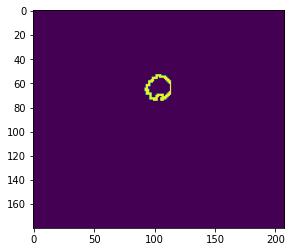

In [23]:
plt.imshow(seg_image[:,:,6,0]>0.0)

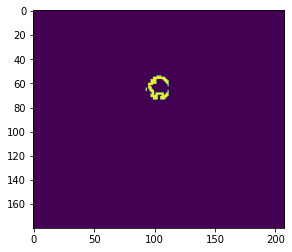

In [21]:
plt.imshow( seg_image[:,:,6,10]>0. )

In [19]:
list(seg_image[:,:,6,10])

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [8]:
df = pd.read_csv("LA_traits_cleaned.csv")
df

,Unnamed: 0,id,mitral_valve_distance_mean,mitral_valve_distance_ED,mitral_valve_distance_ES,left_ventricle_height_mean,left_ventricle_height_ED,left_ventricle_height_ES,left_ventricle_width_mean,left_ventricle_width_ED,left_ventricle_width_ES,left_ventricle_angle_mean,left_ventricle_angle_ED,left_ventricle_angle_ES
0,0,1000012,12.545946,15.260357,1.051248e+01,48.552139,54.386324,42.942491,26.485260,30.167448,22.117885,-22.933452,-20.295219,-27.108434
1,1,1000158,14.585599,18.717840,9.878047e+00,37.622694,45.076566,21.425468,17.700609,22.559405,11.342896,-16.927816,-14.667602,-21.951220
2,3,1000262,5.760992,10.174257,1.943095e-01,39.574230,45.795016,29.654733,23.620716,28.551404,19.034660,-20.516355,-16.723546,-24.931798
3,4,1000369,8.571434,48.478257,8.284961e-02,48.232380,52.346370,44.202334,27.807905,31.621891,23.732224,-37.791964,-31.495978,-42.932694
4,5,1000489,10.093875,17.456578,1.291830e+00,46.820928,52.507317,41.227126,24.613501,29.122172,20.096731,-23.988638,-20.356989,-26.819181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31712,36263,6024290,11.779436,15.569828,8.694877e+00,48.138843,52.766186,40.231015,24.770485,27.659696,20.851153,-14.270961,-12.082599,-15.963890
31713,36264,6024323,3.720606,11.766201,2.213662e-01,32.465728,43.521535,22.021155,18.872417,23.705701,13.816361,-24.931838,-19.716522,-28.411818
31714,36265,6024624,13.014242,17.013090,6.566455e+00,48.994987,54.222933,40.490206,23.729676,27.854550,17.887525,-14.693057,-10.908253,-17.600522
31715,36266,6024638,5.374556,49.286627,1.854362e-01,37.870789,39.681264,34.952932,25.801510,29.218729,20.851423,-31.835701,-26.416417,-36.469836


Text(0.5, 1.0, 'LVMA')

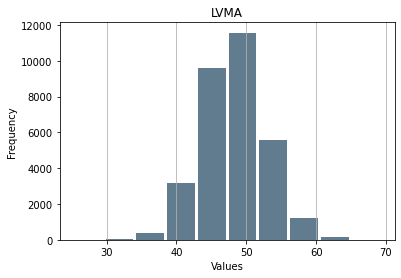

In [11]:
trait = np.array(df['left_ventricle_height_ED'])
create_histogram(trait)
plt.title("LVMA")

Text(0.5, 1.0, 'LVMI')

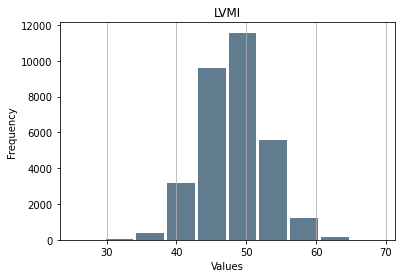

In [12]:
trait = np.array(df['left_ventricle_height_ED'])
create_histogram(trait)
plt.title("LVMI")

Text(0.5, 1.0, 'LVAR')

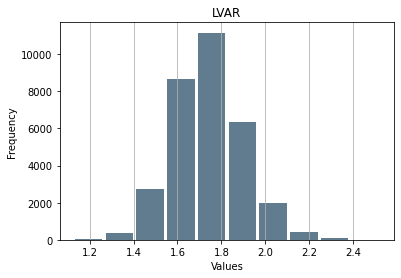

In [14]:
trait = np.array(df['left_ventricle_height_ED'])/np.array(df['left_ventricle_width_ED'])
create_histogram(trait)
plt.title("LVAR")

Text(0.5, 1.0, 'MVD')

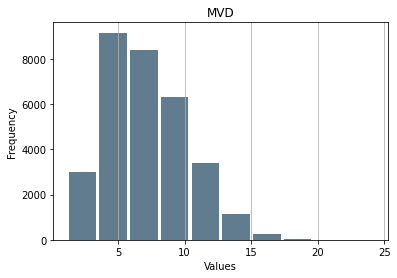

In [13]:
trait = np.array(df['mitral_valve_distance_mean'])
create_histogram(trait)
plt.title("MVD")

In [15]:
df = pd.read_csv("LA_RV_traits_cleaned.csv")
df

,Unnamed: 0,Unnamed: 0.1,id,right_ventricle_height_mean,right_ventricle_height_ED,right_ventricle_height_ES,right_ventricle_width_mean,right_ventricle_width_ED,right_ventricle_width_ES,right_ventricle_angle_mean,right_ventricle_angle_ED,right_ventricle_angle_ES
0,0,0,1000012,21.045780,25.201972,17.120635,41.698699,46.658744,36.575900,29.455790,31.640857,21.079530
1,1,1,1000158,17.582210,23.447129,12.423212,28.369617,33.412666,21.447239,26.590589,28.410010,21.951220
2,2,2,1000262,21.769568,25.289788,17.473545,38.068352,45.155959,31.047978,22.499148,24.974920,19.674448
3,3,3,1000369,23.260034,33.532133,16.187926,36.905133,47.480953,16.187926,19.618180,56.962025,0.000000
4,4,4,1000489,26.491488,29.868894,22.153370,41.567264,51.565353,35.289874,23.933417,26.011561,22.710641
...,...,...,...,...,...,...,...,...,...,...,...,...
34391,34391,34391,6024290,26.999183,30.673238,21.395468,44.532315,51.056561,36.555974,26.306449,28.293538,24.772797
34392,34392,34392,6024323,20.882506,26.857341,15.444785,34.644864,45.921154,25.716589,19.645276,22.024561,17.216969
34393,34393,34393,6024624,24.000615,27.095132,17.825376,44.195772,51.021788,34.811517,31.305931,32.876339,29.593559
34394,34394,34394,6024638,25.259707,41.517962,21.026582,33.509817,38.421195,21.905482,13.349525,46.597645,10.395741


Text(0.5, 1.0, 'RVMA')

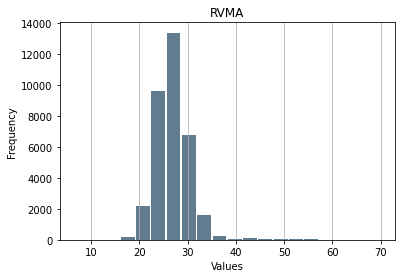

In [20]:
trait = np.array(df['right_ventricle_height_ED'])
create_histogram(trait)
plt.title("LVMA")

Text(0.5, 1.0, 'RVMI')

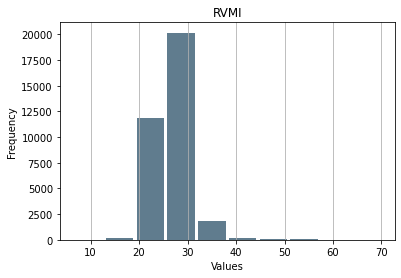

In [18]:
trait = np.array(df['right_ventricle_height_ED'])
create_histogram(trait)
plt.title("RVMI")

Text(0.5, 1.0, 'RVAR')

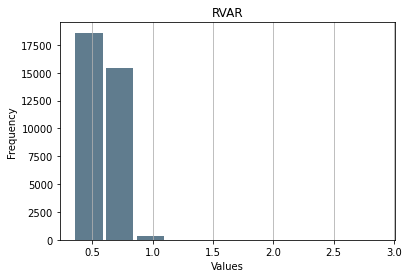

In [19]:
trait = np.array(df['right_ventricle_height_ED'])/np.array(df['right_ventricle_width_ED'])
create_histogram(trait)
plt.title("RVAR")